In [8]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset
df = pd.read_csv("dtsen_dummy_padangpanjang_1000.csv")

# 3. Info Awal
print("Shape:", df.shape)
print("\n--- Info Dataset ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum().sort_values(ascending=False).head(10))
df.head()


Shape: (1000, 40)

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   nik_kepala_keluarga         1000 non-null   int64 
 1   nama_kepala_keluarga        1000 non-null   object
 2   jumlah_anggota_keluarga     1000 non-null   int64 
 3   alamat                      1000 non-null   object
 4   rt                          1000 non-null   int64 
 5   rw                          1000 non-null   int64 
 6   kelurahan                   1000 non-null   object
 7   kecamatan                   1000 non-null   object
 8   kabupaten_kota              1000 non-null   object
 9   provinsi                    1000 non-null   object
 10  status_kepemilikan_rumah    1000 non-null   object
 11  jenis_lantai                1000 non-null   object
 12  jenis_dinding               1000 non-null   object
 13  jenis_ata

,nik_kepala_keluarga,nama_kepala_keluarga,jumlah_anggota_keluarga,alamat,rt,rw,kelurahan,kecamatan,kabupaten_kota,provinsi,...,kepemilikan_kendaraan,kepemilikan_tabungan,penerima_bansos,jenis_bansos,status_stunting,akses_fasilitas_kesehatan,riwayat_penyakit_kronis,disabilitas,tanggal_update,is_poor
0,3201000000000000,Agus Santoso,7,Jl. Contoh No.190,9,1,Pasar Baru,Padang Panjang Barat,Padang Panjang,Sumatera Barat,...,Tidak Ada,Tidak Ada,Ya,BPNT,Tidak,Mudah,Tidak Ada,Tidak,2025-02-12,0
1,3201000000000001,Andi Santoso,5,Jl. Contoh No.21,9,3,Guguk Malintang,Padang Panjang Timur,Padang Panjang,Sumatera Barat,...,Tidak Ada,Tidak Ada,Ya,BLT,Ya,Tidak Ada,Hipertensi,Ya,2025-03-15,1
2,3201000000000002,Dewi Hidayat,8,Jl. Contoh No.197,1,2,Guguk Malintang,Padang Panjang Timur,Padang Panjang,Sumatera Barat,...,Tidak Ada,Tidak Ada,Tidak,BPNT,Ya,Tidak Ada,TBC,Ya,2025-01-28,0
3,3201000000000003,Tono Santoso,5,Jl. Contoh No.98,10,4,Bukit Surungan,Padang Panjang Barat,Padang Panjang,Sumatera Barat,...,Tidak Ada,Ada,Ya,BLT,Ya,Tidak Ada,Asma,Ya,2025-06-16,0
4,3201000000000004,Joko Wijaya,2,Jl. Contoh No.62,10,1,Balai-Balai,Padang Panjang Barat,Padang Panjang,Sumatera Barat,...,Tidak Ada,Tidak Ada,Tidak,PKH,Ya,Mudah,Tidak Ada,Tidak,2025-01-19,1


In [9]:
# Hapus duplikat berdasarkan NIK
df = df.drop_duplicates(subset=["nik_kepala_keluarga"])

# Normalisasi kategori (hapus spasi, huruf kecil/besar)
df['status_kepemilikan_rumah'] = df['status_kepemilikan_rumah'].str.strip().str.title()
df['pendidikan_kepala_keluarga'] = df['pendidikan_kepala_keluarga'].str.strip().str.upper()

# Konversi tanggal
df['tanggal_update'] = pd.to_datetime(df['tanggal_update'], errors='coerce')

# Validasi range data
df['jumlah_anggota_keluarga'] = df['jumlah_anggota_keluarga'].clip(lower=1)
df['luas_lantai'] = df['luas_lantai'].clip(lower=10)

# Buat fitur baru
df['rasio_pengeluaran_pendapatan'] = df['pengeluaran_per_bulan'] / df['pendapatan_per_bulan']
df['kepadatan_rumah'] = df['jumlah_anggota_keluarga'] / df['luas_lantai']


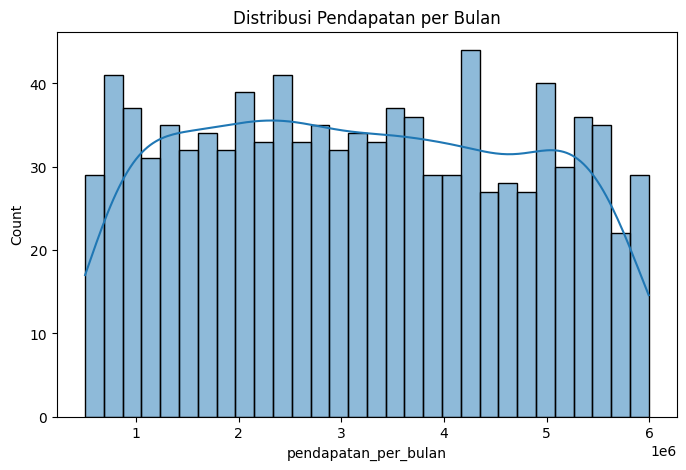

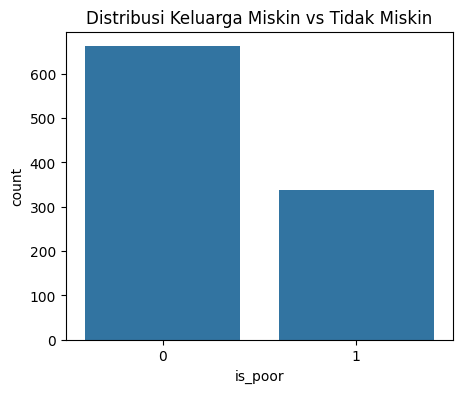

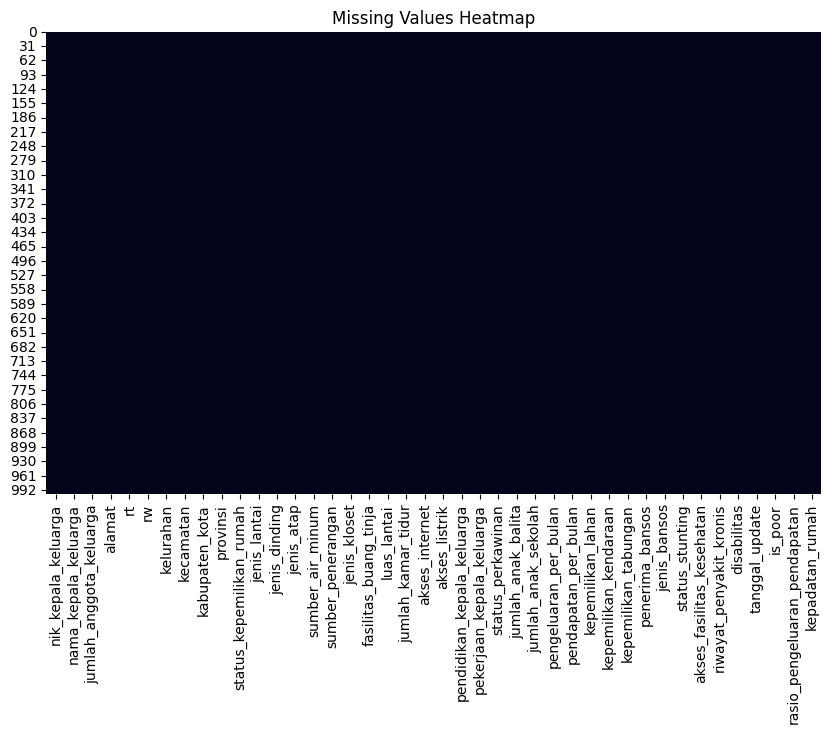

In [10]:
# Distribusi Pendapatan
plt.figure(figsize=(8,5))
sns.histplot(df['pendapatan_per_bulan'], bins=30, kde=True)
plt.title("Distribusi Pendapatan per Bulan")
plt.show()

# Distribusi Label Kemiskinan
plt.figure(figsize=(5,4))
sns.countplot(x='is_poor', data=df)
plt.title("Distribusi Keluarga Miskin vs Tidak Miskin")
plt.show()

# Heatmap Missing Values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [11]:
df.to_csv("dtsen_clean_padangpanjang.csv", index=False)
print("✅ Dataset bersih disimpan: dtsen_clean_padangpanjang.csv")


✅ Dataset bersih disimpan: dtsen_clean_padangpanjang.csv
